![TEXT](../1.-%20Proyecto%20EDA%202%20%5BEntregable%5D/Residuos2.jpg)

In [192]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2 # Para operar con imágenes
import seaborn as sns
import tensorflow as tf
import random
from sklearn.metrics import confusion_matrix

**Dataset**

Set de datos obtenidos de kaggle

https://www.kaggle.com/code/beyzanks/waste-classification-with-cnn/notebook

**Presentación**

Enlace a presentación en PREZI

https://prezi.com/view/lzb9ly60KqgDEZO1OWk3/

In [8]:
TRAIN_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN'
TEST_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST'

In [9]:
os.listdir('C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN')

['O', 'R']

In [10]:
os.listdir('C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST')

['O', 'R']

In [11]:
class_names = ['O','R']

# Tamaño aproximado de la muestra
IMAGE_SIZE = (300,300)

In [12]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'O': 0, 'R': 1}

In [13]:
PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\'
TRAIN_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN\\'
TEST_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST\\'

In [14]:
def read_data(path, im_size,class_names_label):
    X=[]
    y=[]

    for folder in os.listdir(path):
        label=class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre lo que haya en el path
        for file in os.listdir(folder_path):
            image_path=os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)

    return np.array(X),np.array(y)

X_train, y_train = read_data(TRAIN_PATH,IMAGE_SIZE,class_names_label)
X_test, y_test=read_data(TEST_PATH,IMAGE_SIZE,class_names_label)

print(X_train.shape)
print(X_test.shape)

(800, 300, 300, 3)
(400, 300, 300, 3)


In [15]:
X_train[0].shape

(300, 300, 3)

In [16]:
X_train[0]

array([[[239, 237, 238],
        [239, 237, 238],
        [239, 237, 238],
        ...,
        [227, 227, 227],
        [227, 227, 227],
        [227, 227, 227]],

       [[239, 237, 238],
        [239, 237, 238],
        [239, 237, 238],
        ...,
        [227, 227, 227],
        [227, 227, 227],
        [227, 227, 227]],

       [[239, 237, 238],
        [239, 237, 238],
        [239, 237, 238],
        ...,
        [227, 227, 227],
        [227, 227, 227],
        [227, 227, 227]],

       ...,

       [[227, 225, 226],
        [227, 225, 226],
        [228, 226, 227],
        ...,
        [167, 152, 145],
        [167, 152, 147],
        [168, 153, 150]],

       [[227, 225, 226],
        [227, 225, 226],
        [228, 226, 227],
        ...,
        [169, 154, 149],
        [169, 154, 151],
        [170, 154, 153]],

       [[227, 225, 226],
        [228, 226, 227],
        [228, 226, 227],
        ...,
        [171, 156, 151],
        [171, 156, 153],
        [171, 155, 155]]

<Axes: >

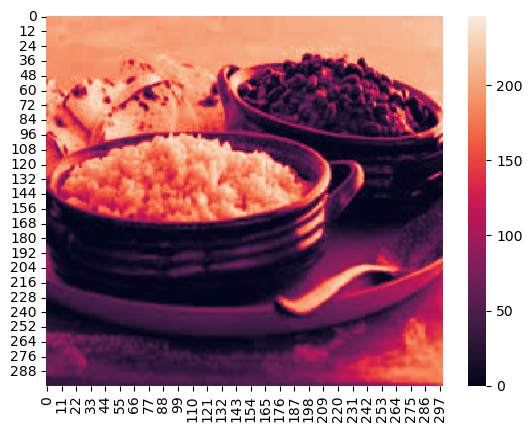

In [17]:
sns.heatmap(X_train[9,:,:,1])

In [18]:
x_data = [] 
y_data = [] 

for category in glob(TRAIN_PATH+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

data=pd.DataFrame({'image': x_data,'label': y_data})

In [19]:
# Convolutional Neural Network - CNN

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[IMAGE_SIZE[0],IMAGE_SIZE[1],3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [21]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [22]:
# Normalizamos
X_train_scal = X_train.astype("float32")/255
X_test_scal = X_test.astype("float32")/255

In [23]:
history = model.fit(X_train_scal,y_train,batch_size=10,epochs=5,validation_split=0.1)

Epoch 1/5
72/72 [==============================] - 46s 626ms/step - loss: 0.7016 - accuracy: 0.8319 - val_loss: 0.0150 - val_accuracy: 0.9875
Epoch 2/5
72/72 [==============================] - 45s 621ms/step - loss: 0.2719 - accuracy: 0.9181 - val_loss: 0.1752 - val_accuracy: 0.9125
Epoch 3/5
72/72 [==============================] - 45s 623ms/step - loss: 0.1909 - accuracy: 0.9389 - val_loss: 0.0204 - val_accuracy: 0.9875
Epoch 4/5
72/72 [==============================] - 45s 627ms/step - loss: 0.1109 - accuracy: 0.9583 - val_loss: 0.1018 - val_accuracy: 0.9500
Epoch 5/5
72/72 [==============================] - 45s 625ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.0392 - val_accuracy: 0.9875


In [24]:
df_hist=pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,0.701589,0.831944,0.015003,0.9875
1,0.271918,0.918056,0.175233,0.9125
2,0.190900,0.938889,0.020443,0.9875
3,0.110883,0.958333,0.101750,0.9500
4,0.112888,0.965278,0.039242,0.9875


Text(0.5, 1.0, 'loss')

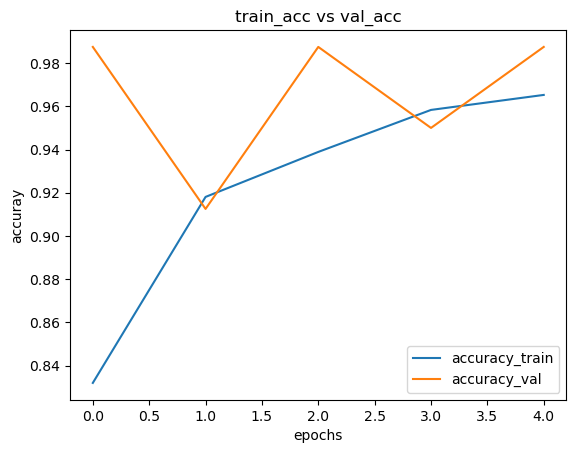

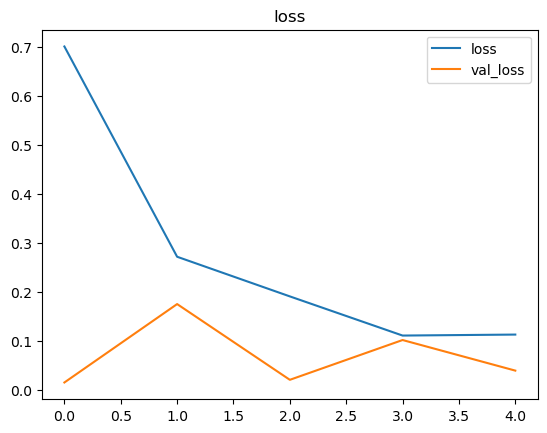

In [25]:
plt.figure()
plt.plot(df_hist['accuracy'],label="accuracy_train")
plt.plot(df_hist['val_accuracy'],label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuray")
plt.xlabel("epochs")
plt.legend()


plt.figure()
plt.plot(df_hist['loss'],label="loss")
plt.plot(df_hist['val_loss'],label="val_loss")
plt.legend()
plt.title('loss')

In [26]:
## Con 7 épocas parece la mejor opción, vamos a probar otras opciones de modelo.

In [27]:
# Precisión del modelo
results = model.evaluate(X_test_scal,y_test)

13/13 [==============================] - 3s 201ms/step - loss: 0.2680 - accuracy: 0.9150


In [28]:
predictions = model.predict(X_test_scal)
predictions.round()

13/13 [==============================] - 3s 202ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
# Tenemos 10 imágenes de predicción por número, los que son distintos en la serie es que lo clasifica mal.
pred_labels = np.argmax(predictions,axis=1)
pred_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<Axes: >

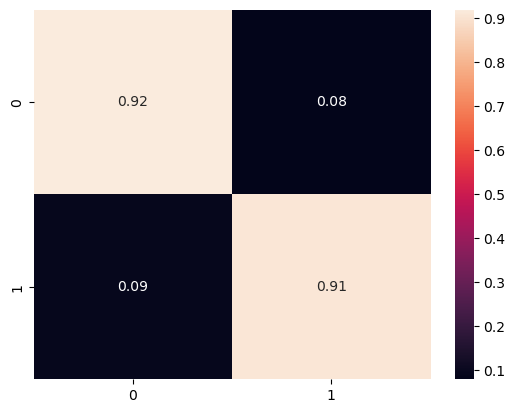

In [30]:
c_mat = confusion_matrix(y_test,pred_labels)
sns.heatmap(c_mat/np.sum(c_mat,axis=1),annot=True)

In [31]:
predictions = model.predict(X_test_scal)
print(predictions.shape)

13/13 [==============================] - 3s 205ms/step
(400, 10)


In [65]:
predictions[1][0]

0.9928116

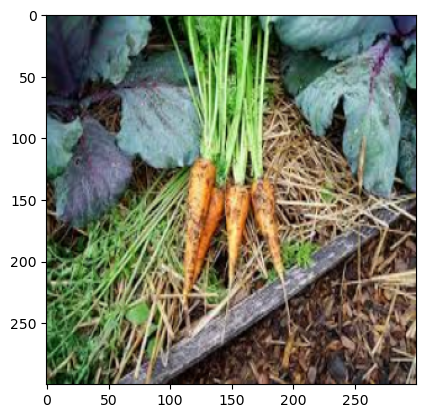

In [189]:
plt.figure()
plt.imshow(X_test_scal[2])
# plt.colorbar()

In [170]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

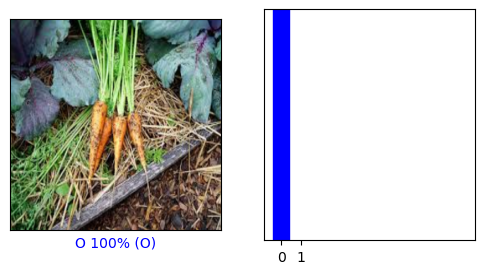

In [171]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test_scal)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],y_test)
plt.show()

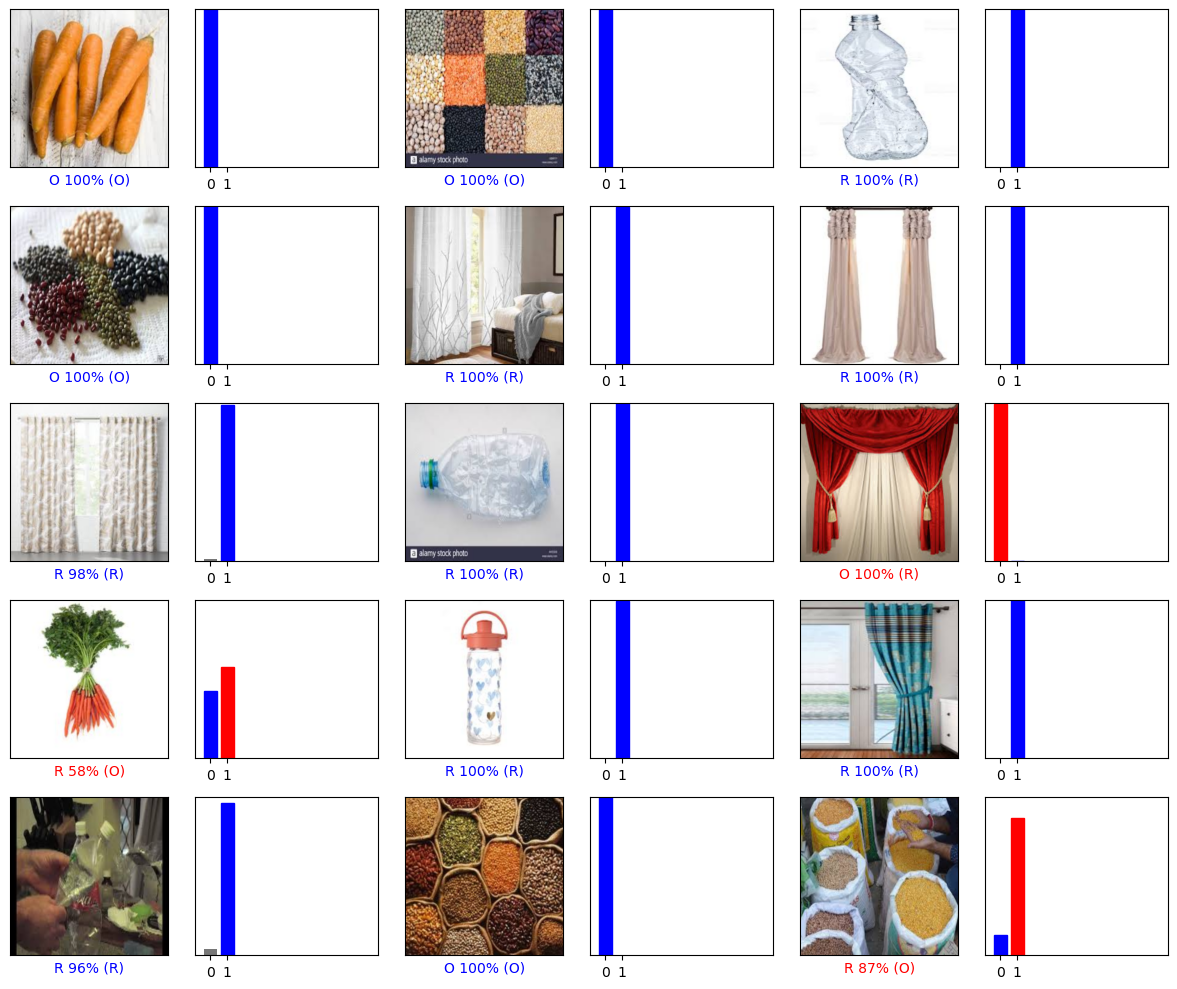

In [200]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
# Crear una secuencia con los números del 1 a la longitud de la muestra de test
secuencia = range(1, len(y_test))

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  # Obtener un número aleatorio sin repetir
  numero = random.sample(secuencia, 1)[0]
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(numero, predictions[numero], y_test, X_test_scal)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(numero, predictions[numero], y_test)
plt.tight_layout()
plt.show()